In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def plot_training_loss(data, num_epochs, title, train=True):
    colors = sns.color_palette("husl", 2)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    batches_per_epoch = len(data) // num_epochs

    xs = range(len(data))
    tick_interval = 100

    train_label = "Training" if train else "Validation"

    plt.plot(xs, data, color=colors[0], label=f"{train_label} Loss")

    if train:
        window_size = 10
        padding = [data[0]] * (window_size//2) + data + [data[-1]] * (window_size//2)
        moving_avg = np.convolve(padding, np.ones(window_size)/window_size, mode='valid')
        xs_ma = np.arange(window_size//2, len(padding)-window_size//2 + 1, 1)
        plt.plot(xs_ma - window_size//2, moving_avg, color=colors[1], label='Moving Average')

    plt.title(f'{train_label} {title} per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(data)+1, tick_interval), range(0, (len(data)+1)*tick_interval, tick_interval*100))
    plt.tick_params(axis='both', which='major', labelsize=12)

    for epoch in range(1, num_epochs+1):
        epoch_end = epoch * batches_per_epoch
        plt.axvline(x=epoch_end-1, linestyle='dotted', color='black')

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


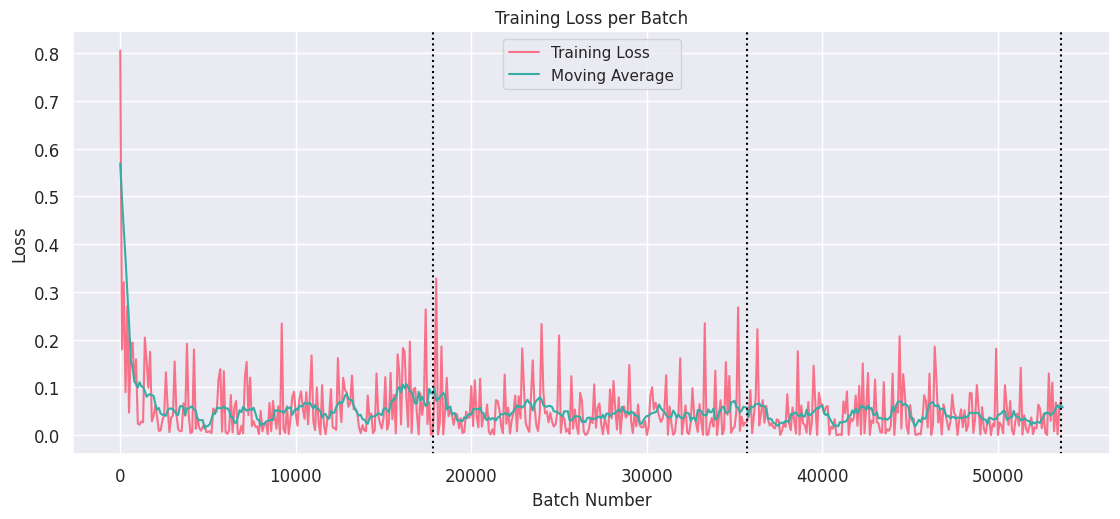

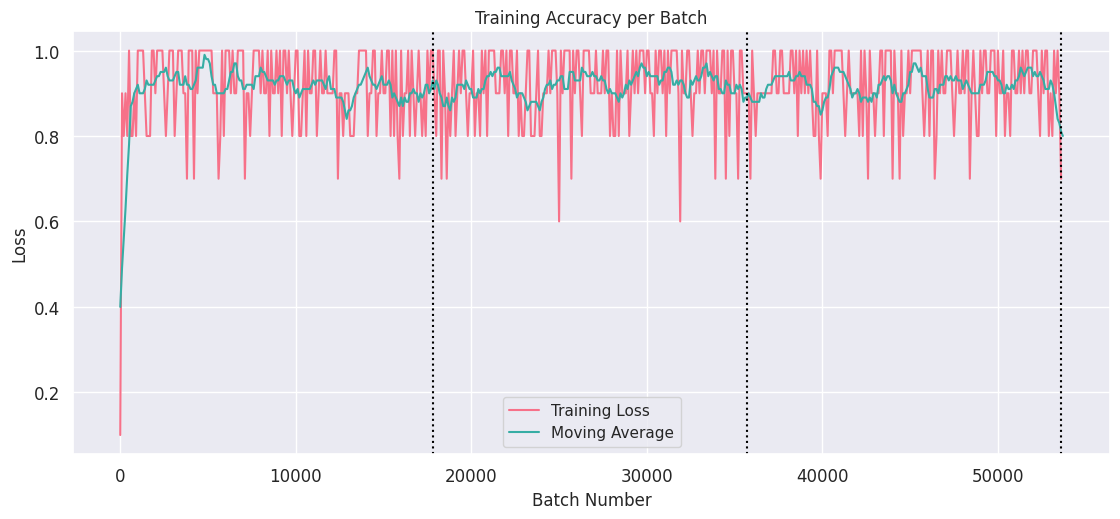

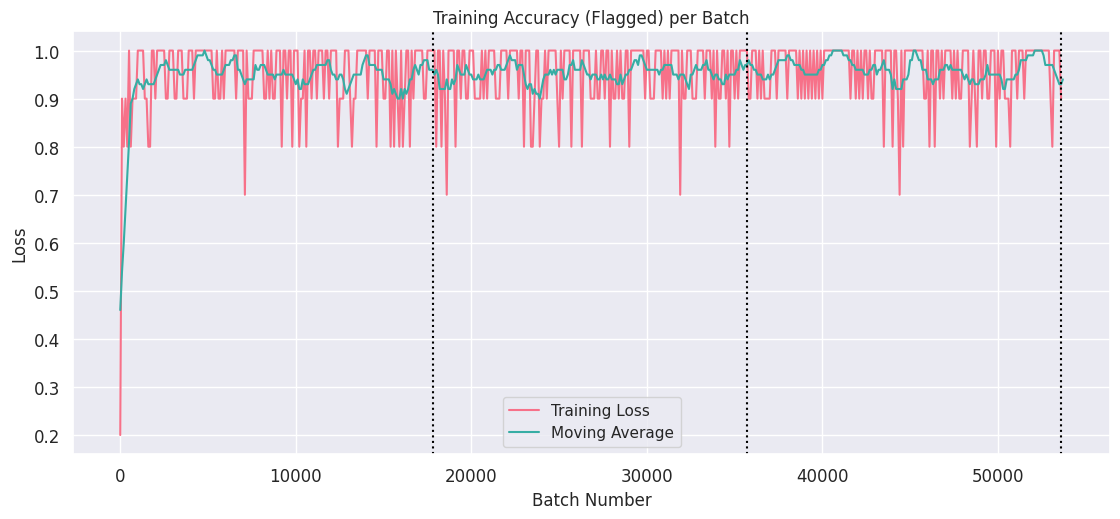

In [3]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_1/checkpoints/train_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data['loss'], 3, "Loss")
plot_training_loss(data['acc'], 3, "Accuracy")
plot_training_loss(data['acc_flag'], 3, "Accuracy (Flagged)")

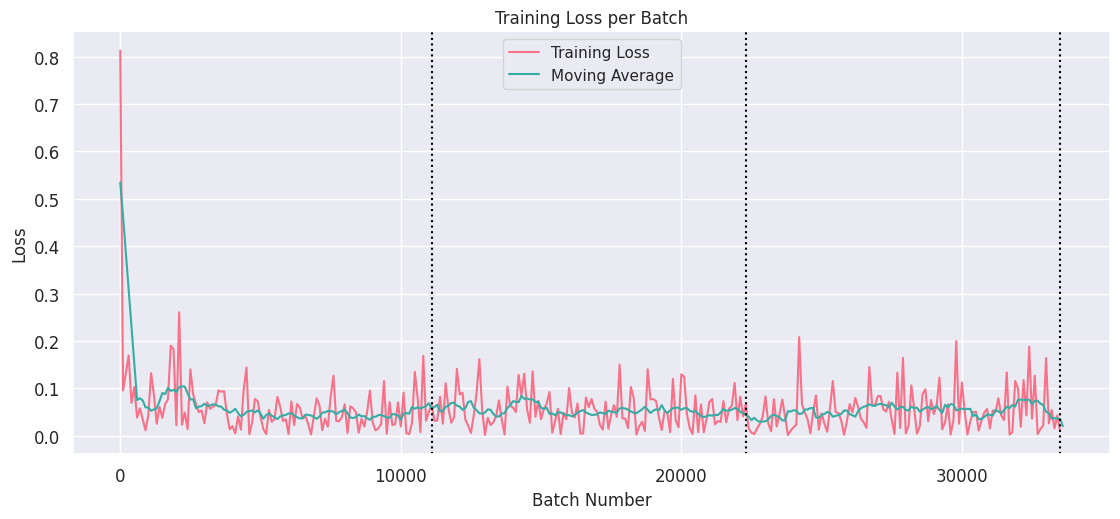

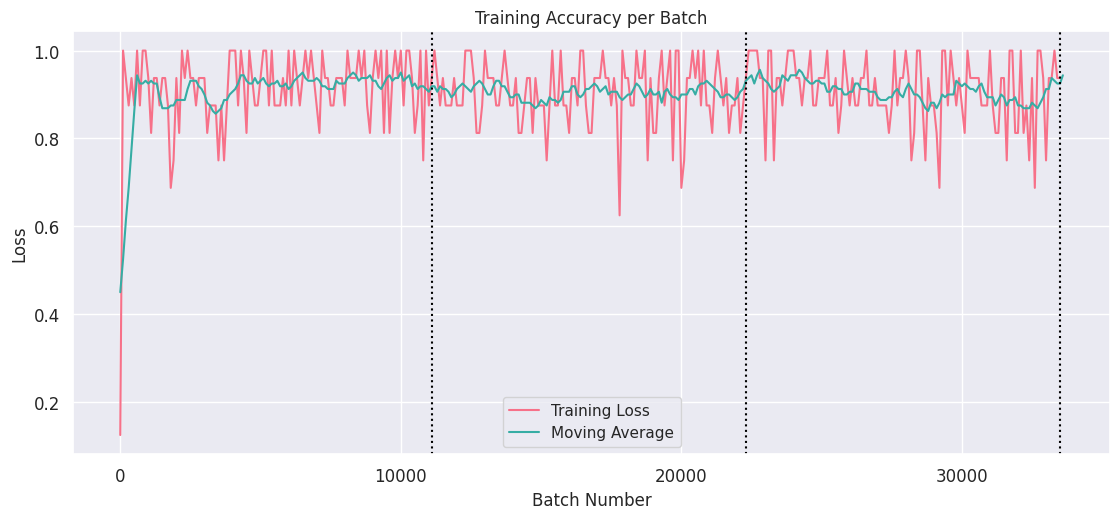

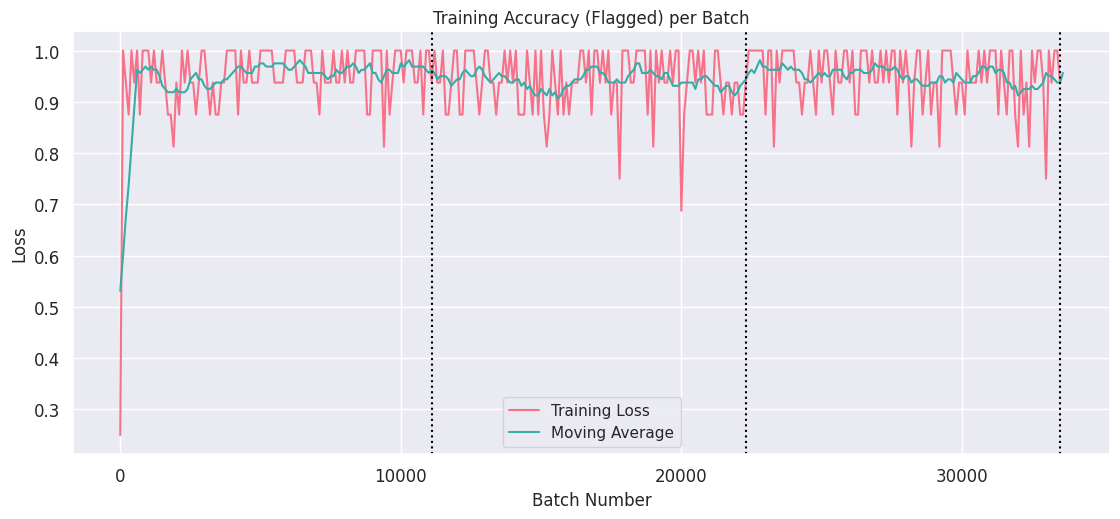

In [4]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_5/checkpoints/train_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data['loss'], 3, "Loss")
plot_training_loss(data['acc'], 3, "Accuracy")
plot_training_loss(data['acc_flag'], 3, "Accuracy (Flagged)")

In [5]:
def plot_val_loss(data, num_epochs, title, train=True):
    colors = sns.color_palette("husl", 2)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    batches_per_epoch = len(data) // num_epochs

    xs = range(len(data))
    tick_interval = 10

    train_label = "Training" if train else "Validation"

    plt.plot(xs, data, color=colors[0], label=f"{train_label} Loss")

    # if train:
    window_size = 10
    padding = [data[0]] * (window_size//2) + data + [data[-1]] * (window_size//2)
    moving_avg = np.convolve(padding, np.ones(window_size)/window_size, mode='valid')
    xs_ma = np.arange(window_size//2, len(padding)-window_size//2 + 1, 1)
    plt.plot(xs_ma - window_size//2, moving_avg, color=colors[1], label='Moving Average')

    plt.title(f'{train_label} {title} per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(data)+1, tick_interval), range(0, (len(data)+1)*tick_interval, tick_interval*100))
    plt.tick_params(axis='both', which='major', labelsize=12)

    for epoch in range(1, num_epochs+1):
        epoch_end = epoch * batches_per_epoch
        plt.axvline(x=epoch_end-1, linestyle='dotted', color='black')

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (1).

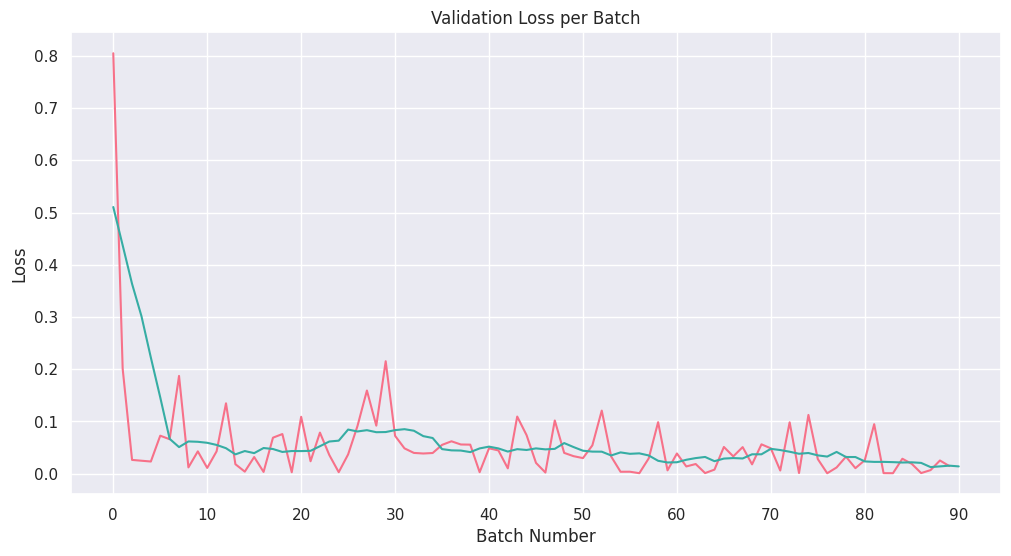

In [6]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/version_2/checkpoints/val_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_val_loss(data['loss'], 3, "Loss", train=False)
plot_val_loss(data['recall'], 3, "Recall", train=False)